In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

import sys
sys.path.append('../_styling/')
from style import prep_plot, BLACK, GRAY1

In [2]:
# original report available here
# https://www.galaxy.com/research/insights/2021-crypto-vcs-biggest-year-ever/

# extract points via https://plotdigitizer.com/app
lines = [
    (2016.008803848553, 155.92023537103628),
    (2016.2479750675766, 118.08434128800262),
    (2016.4916297279926, 120.47728015691402),
    (2016.7381374874772, 104.1909120627656),
    (2016.9878244144945, 230.00326904217064),
    (2017.2486520140635, 141.248774109186),
    (2017.4921708126194, 177.04478587773784),
    (2017.7334071319208, 212.6381170317097),
    (2018.0087447781789, 488.13991500490357),
    (2018.2451444152505, 451.9973847662635),
    (2018.4922771392926, 437.94704151683555),
    (2018.7469909551444, 317.62667538411245),
    (2018.9846676937036, 436.6721150702844),
    (2019.24886466741, 344.1124550506702),
    (2019.4838513411337, 305.9104282445244),
    (2019.7357935750335, 280.30075187969925),
    (2019.990018288188, 314.5995423340961),
    (2020.2464167911082, 228.37528604118992),
    (2020.4868651116194, 270.1274926446551),
    (2020.7326663894298, 294.6845374305328),
    (2020.9902333043494, 510.0621118012422),
    (2021.237855131089, 526.6165413533835),
    (2021.4898517097329, 492.50735534488393),
    (2021.742908010888, 485.83850931677017)    
]
bars = [
    (2015.9921200120975, 13.664596273291925),
    (2016.2494152032966, 19.64040536122916),
    (2016.4998086119879, 10.885910428244525),
    (2016.7493868495171, 0.8434128800261523),
    (2016.9846724193335, 10.748610657077476),
    (2017.2440055384384, 32.788492971559336),
    (2017.5090720280514, 18.097417456685193),
    (2017.7368036784303, 49.336384439359264),
    (2017.999261620324, 97.2736188296829),
    (2018.2427532465078, 141.88296829029093),
    (2018.495945409523, 91.38280483818241),
    (2018.7499799160728, 156.47597254004577),
    (2018.9945312647676, 55.19450800915332),
    (2019.2518536283387, 42.22294867603792),
    (2019.5005080052172, 35.61294540699575),
    (2019.742994253634, 62.798300098071266),
    (2019.9891759446534, 54.94606080418438),
    (2020.2418246602272, 24.47858777378228),
    (2020.4845011152486, 167.26381170317097),
    (2020.7378291401244, 82.42562929061785),
    (2020.9961025367181, 363.25596600196144),
    (2021.2366052019734, 332.55312193527294),
    (2021.4981121108444, 415.41026479241583),
    (2021.7388864998204, 537.6593658058189)
]

# clean data

deal_count = list(map(lambda x: round(x[1]), lines))
dollars = list(map(lambda x: round(x[1])/50, bars))

# Convert x labels to quarters
xrange = list(map(lambda x: round(x[0]*4)/4, bars))
quarters = [f"{int(year)}\nQ{int((year % 1) * 4) + 1}" for year in xrange]

<Figure size 3740x1496 with 0 Axes>

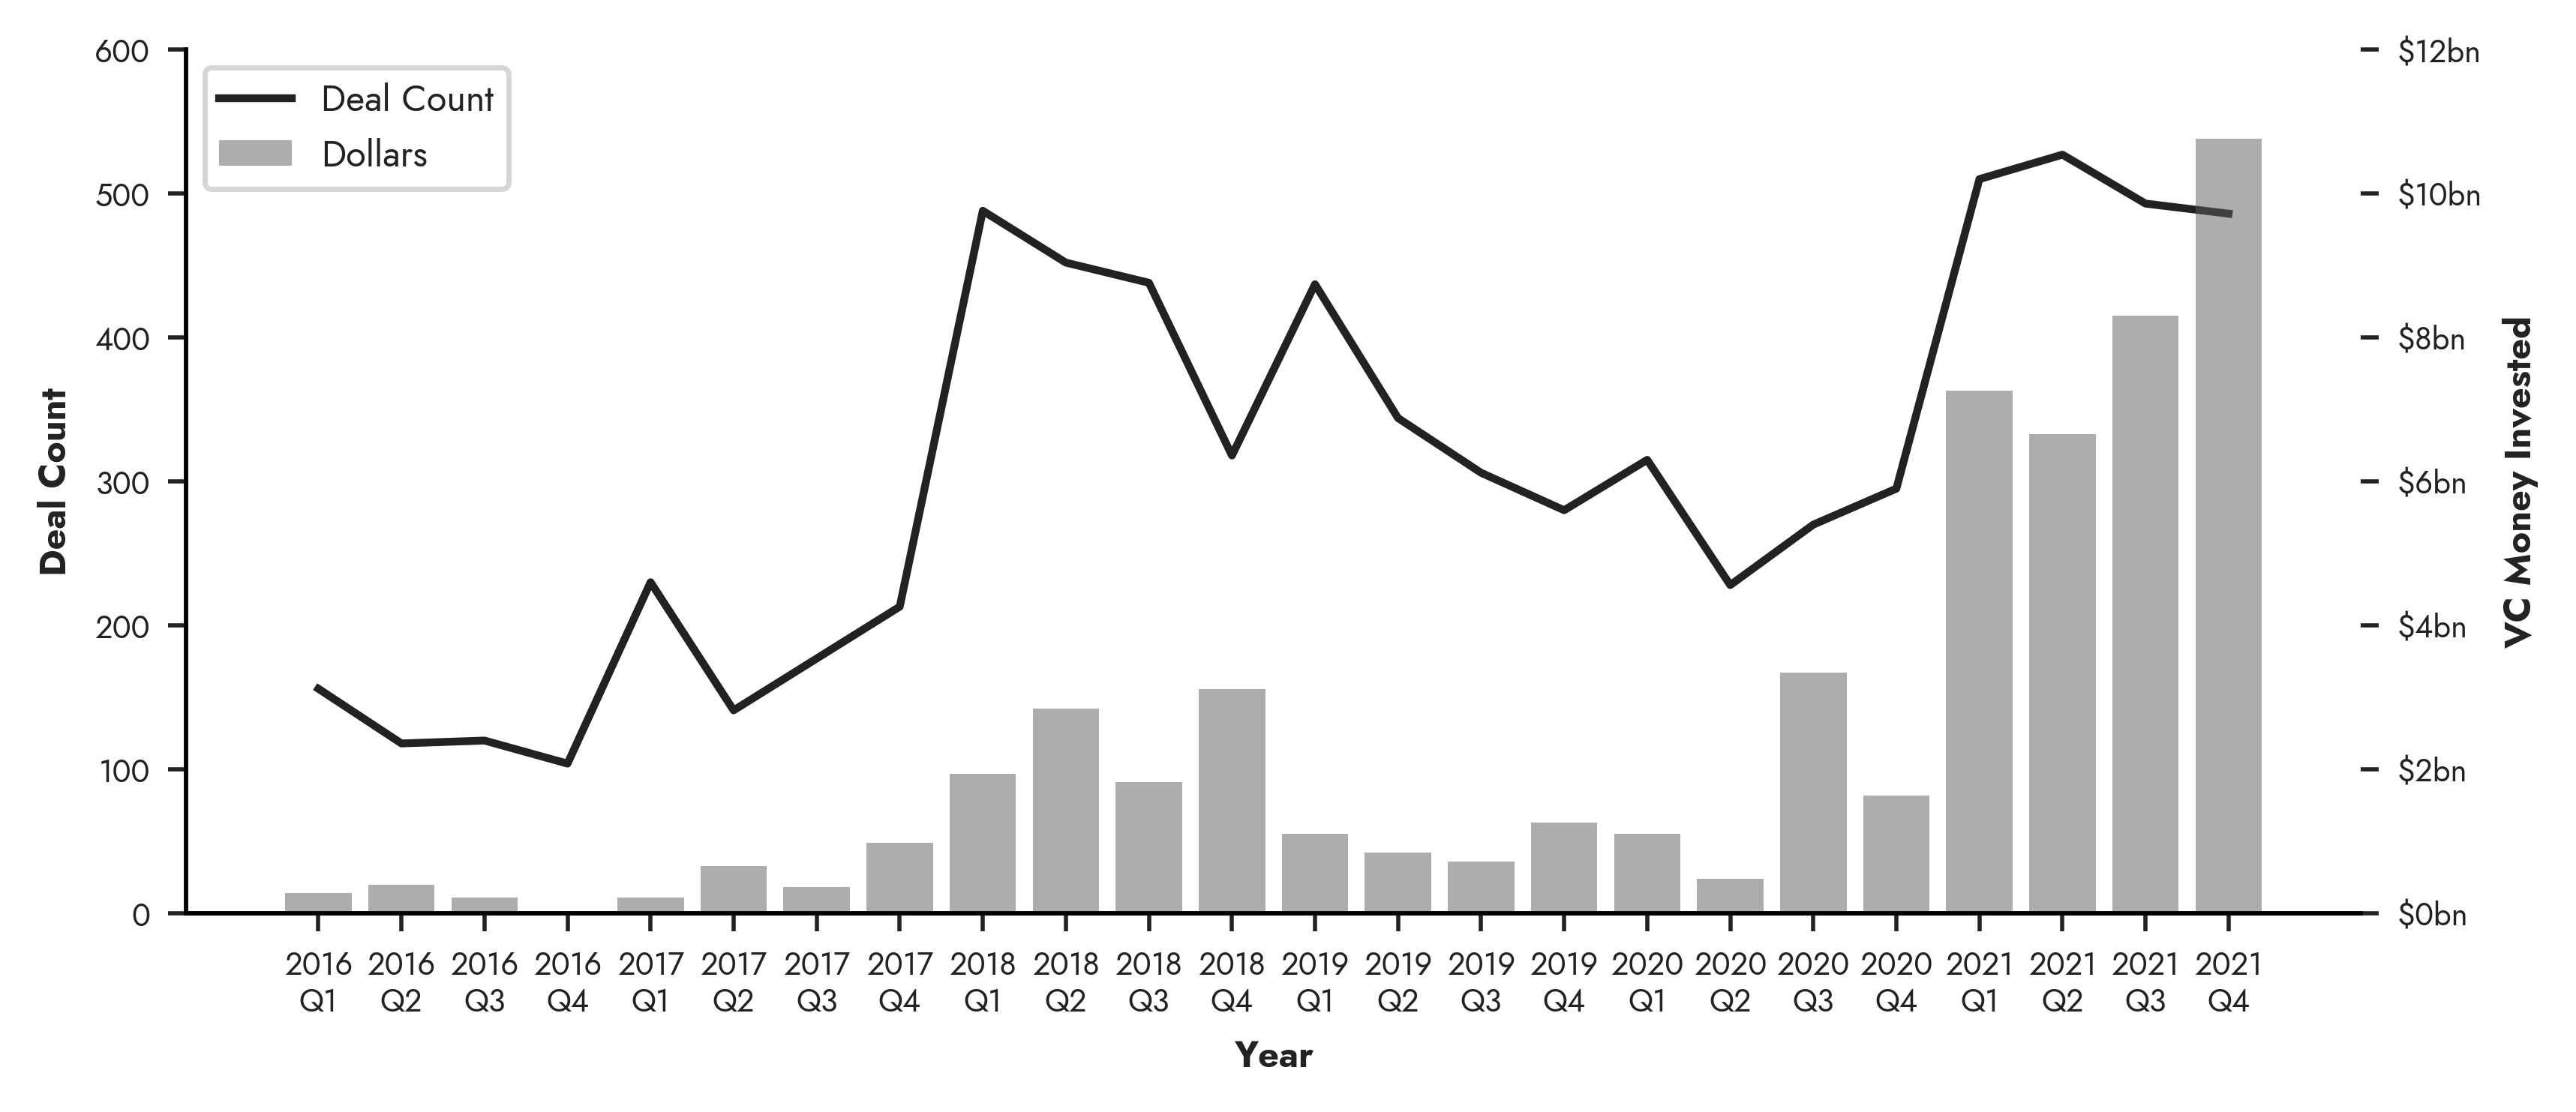

In [3]:
# Plotting
plt = prep_plot()
fig, ax1 = plt.subplots()

FONTSIZE = 6

# Line chart
ax1.plot(xrange, deal_count, color=BLACK, label='Deal Count')
ax1.set_xlabel('Year', fontsize=FONTSIZE+1, weight='bold')
ax1.set_ylabel('Deal Count', fontsize=FONTSIZE+1, weight='bold')
ax1.tick_params('y', labelsize=FONTSIZE)
ax1.set_xticks(xrange)
ax1.set_xticklabels(quarters, rotation=0, fontsize=FONTSIZE)
ax1.set_ylim(0, 600)

# Bar chart (secondary axis)
ax2 = ax1.twinx()
ax2.bar(xrange, dollars, width=0.2, alpha=0.5, color=GRAY1, label='Dollars')
ax2.set_ylabel('VC Money Invested', fontsize=FONTSIZE+1, weight='bold')
ax2.tick_params('y', labelsize=FONTSIZE)
ax2.set_ylim(0, 12)

# Define a formatter function to format tick labels in billions
def billions_formatter(x, pos):
    return '${:.0f}bn'.format(x)
ax2.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, fontsize=FONTSIZE+1)

plt.savefig("crypto_vc.png")